In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'C:/Users/himan/Downloads/medical_cost_insurance.csv'

In [3]:
file_path

'C:/Users/himan/Downloads/medical_cost_insurance.csv'

In [4]:
df=pd.read_csv(file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The data contains 7 columns from which age, bmi, children and charges are numerical columns and sex, smoker and region are categorical columns. The problem statement is to predict the charges so here age, sex, bmi, children, smoker and region will be considered as input columns and charges as the target and the analysis will be conducted via linear regression algorithm

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As none of the columns contains null values, hence data cleaning or data imputation is not required.

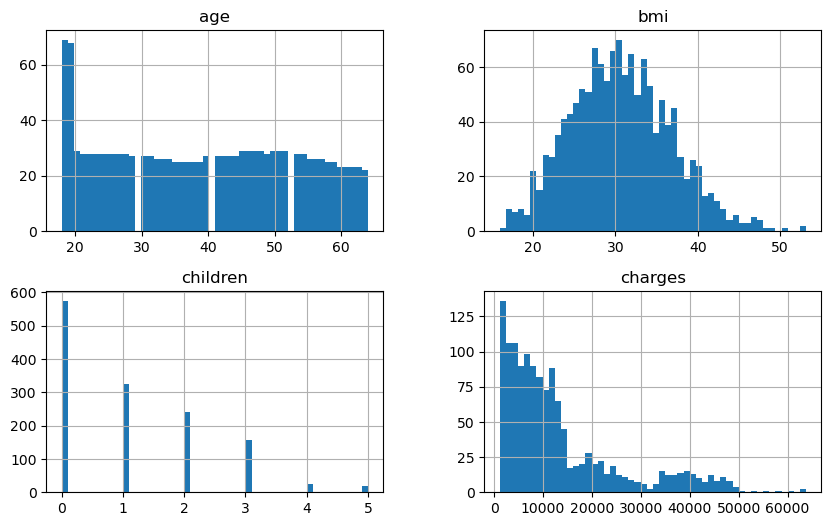

In [8]:
import matplotlib.pyplot as plt


df.hist(figsize=(10, 6), bins=50)
plt.show()

The age distribution is relatively even for all the ages, whereas there is a slight increase in the number of young childrens.
The distribution of BMI appears approximantely normal, with most values centered around 25-35. Whereas, a healthy BMI typically ranges from 18.5 to 24.9 as per the instructions.
A large number of population do not have children that are covered by health insurance, while the rest mostly have 1 to 2 children and very few of them have 4 or 5 children.
The distribution of charges are skewed to the right which indicated that most families have lower costs for medical insurance and there are very few with higher costs.

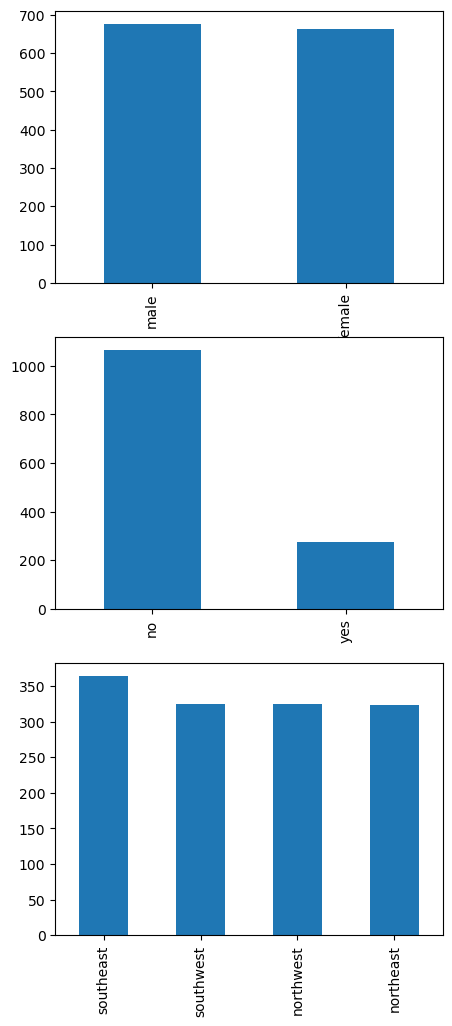

In [9]:
categorical_columns = ['sex', 'smoker', 'region']
plt.figure(figsize=(5, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i+1)
    df[col].value_counts().plot(kind='bar')

plt.show()

The distribution between males and females is fairly even. A majority of the data do not smoke, while a smaller proportion are smokers.
The distribution across regions is fairly uniform, with a slight increase in the southeast.

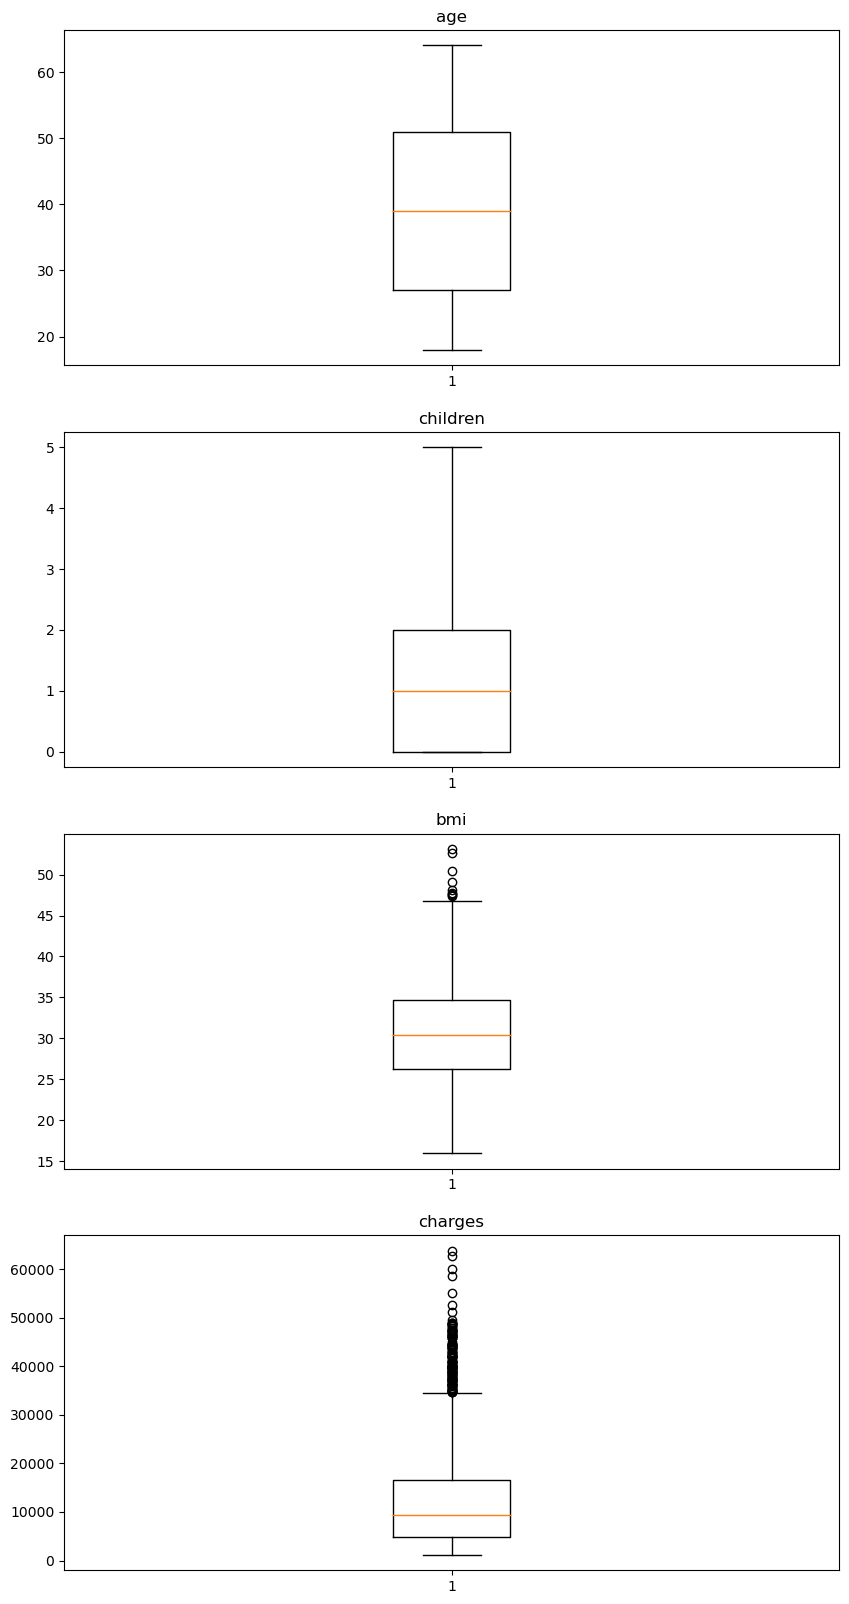

In [10]:
#Checking for outliers
fig = plt.figure(figsize =(10, 20))
numerical_columns = ['age', 'children', 'bmi', 'charges']
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.show()

It can be observed that bmi and charges has some outliers but as it is not the measurement error or data collection error but those are the actual values as per the size and measurements of the family. Hence, this values should not be ignored and taken into consideration for the logistics model preparation, because removal of these outliers will result in the loss of useful information

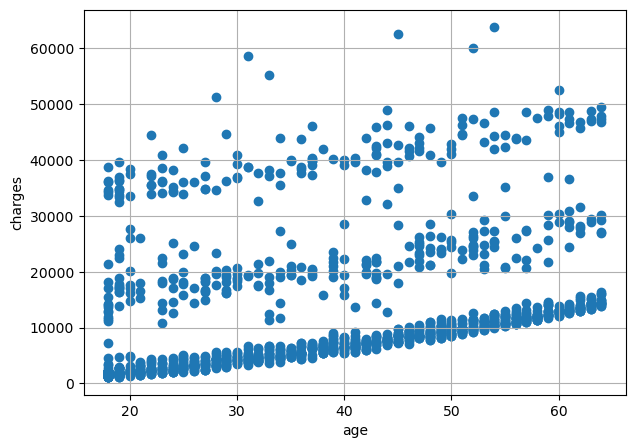

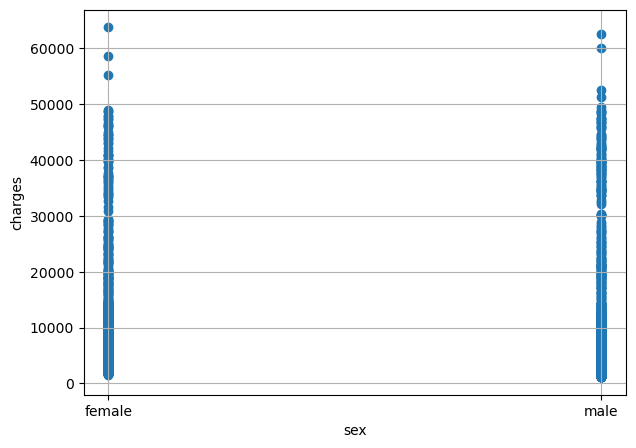

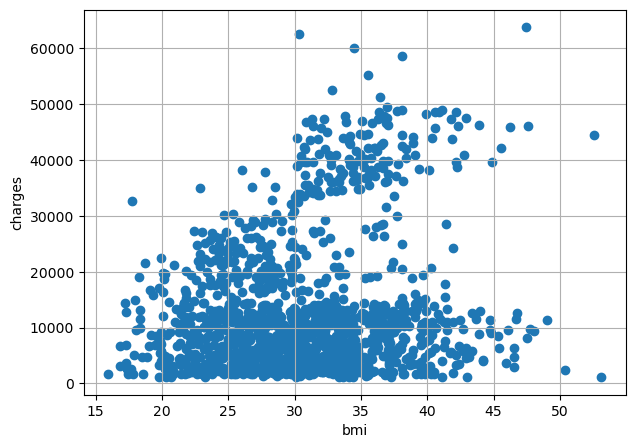

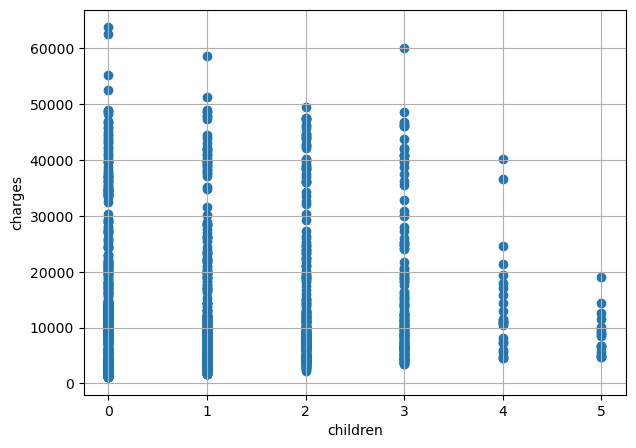

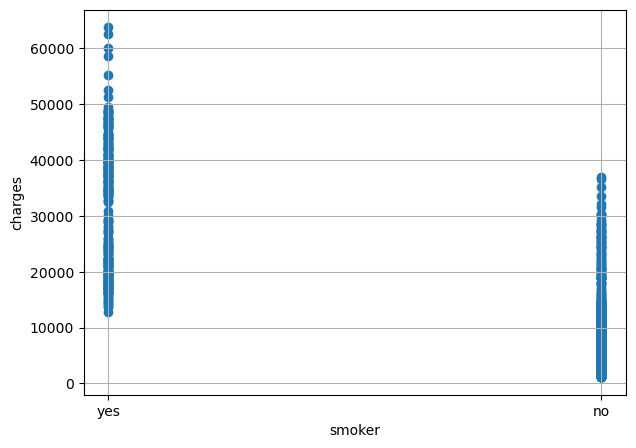

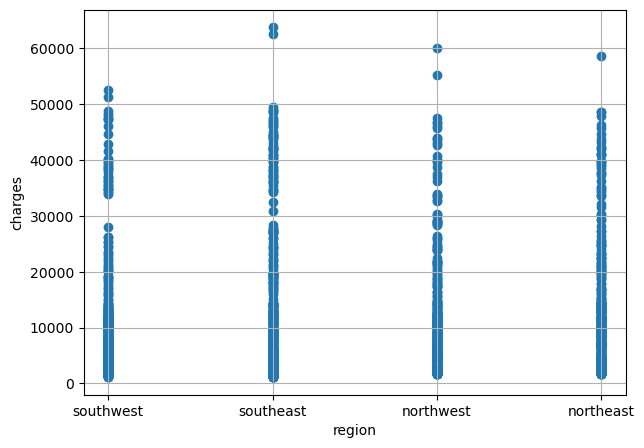

In [11]:
#plotting scatter plot to check for correlation between input columns and charges
import matplotlib.pyplot as plt
input_columns = df.columns.tolist()
input_columns.remove('charges')
input_columns
for i in input_columns:
    plt.figure(figsize=(7, 5))
    plt.scatter(df[i], df['charges'])
    plt.xlabel(i)
    plt.ylabel('charges')
    plt.grid(True)
    plt.show()

<AxesSubplot:>

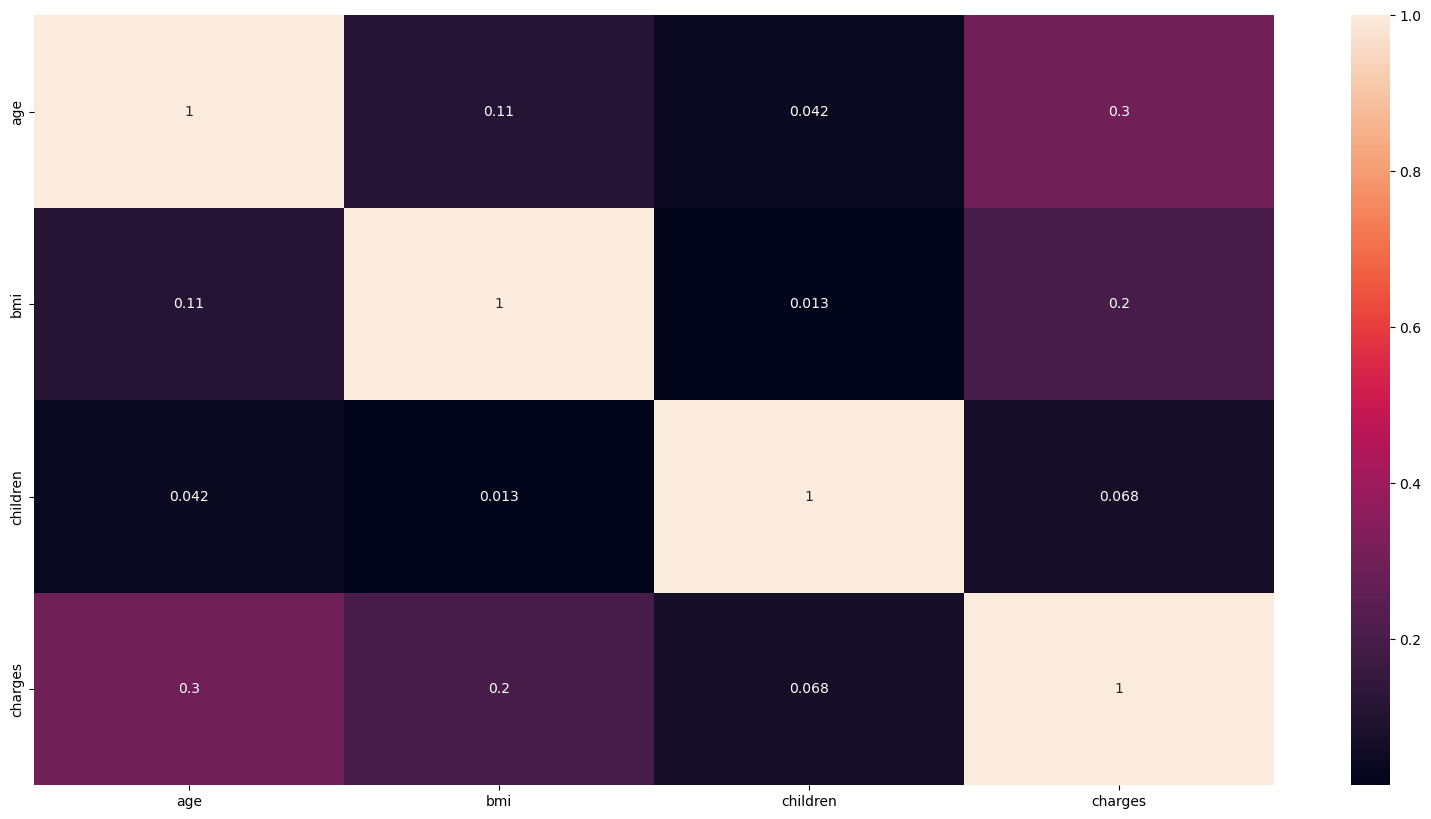

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

In [14]:
#Using one hot encoder
df1 = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


Here, drop_first = True is used to prevent multicollinearity by dropping the first category and regions are splitted with 1 denoting Yes and 0 denoting No

In [15]:
x = df1.drop('charges', axis=1)
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [16]:
y = df1['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [18]:
#Import train test split to split the dataframe into testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train.shape

(1070, 8)

In [20]:
x_test.shape

(268, 8)

In [21]:
y_train.shape

(1070,)

In [22]:
y_test.shape

(268,)

In [24]:
#Using simple linear regression algorithm to find out the charges as per the input values
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(x_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

rmse, r2

(5796.284659276272, 0.7835929767120724)

Root Mean Squared Error=5796.28 which represents the average difference between the actual and predicted charges and a lower RMSE indicates a better fit to the data.
R-squared = 0.7835 indicates that approximately 78.35% of the variance in the medical charges can be explained by the model. A value closer to 1 suggests that the model explains a significant portion of the variance in the target variable.

In [27]:
#Creating a prediction function
def pred_medical_charges(model, age, sex, bmi, children, smoker, region):
    input_data = pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'children': [children],
        'sex_male': [1 if sex.lower() == 'male' else 0],
        'smoker_yes': [1 if smoker.lower() == 'yes' else 0],
        'region_northwest': [1 if region.lower() == 'northwest' else 0],
        'region_southeast': [1 if region.lower() == 'southeast' else 0],
        'region_southwest': [1 if region.lower() == 'southwest' else 0],})
    predicted_charge = model.predict(input_data)
    return predicted_charge[0]

In [37]:
# Example by using the random values
predicted_value = pred_medical_charges(lr, 27, 'male', 24.5, 2, 'yes', 'northwest')
print(f"Predicted medical charges", predicted_value)

Predicted medical charges 27378.309934801655
